In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow_hub.keras_layer import keras

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

C:\Users\Administrator\anaconda3\envs\DeepLearning-py310\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
# 创建一个input对象下划线是为了避免和input函数重名
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
# 创建一个Concatenate层 将输入和第二层的输出连接起来
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat) # 将合并后的数据传入输出层
model = keras.models.Model(inputs=input_, outputs=output) # 创建一个model指定输入和输出

## 通过宽路径和深路径的结合来提升模型的表现能力

In [3]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=output)

In [6]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate= 1e-3))
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:,:5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit(
    (X_train_A, X_train_B), y_train, epochs=20,
    validation_data=((X_valid_A, X_valid_B), y_valid)
)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4233 - val_loss: 0.3985
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4222 - val_loss: 0.3980
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4198 - val_loss: 0.3989
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4183 - val_loss: 0.3935
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4168 - val_loss: 0.3872
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4152 - val_loss: 0.3842
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4136 - val_loss: 0.3875
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4124 - val_loss: 0.4012
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4113 - val_loss: 0.3828
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4103 - val_loss: 0.3909

In [7]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

1/1 [==============================] - 0s 49ms/step


## 绘制训练曲线

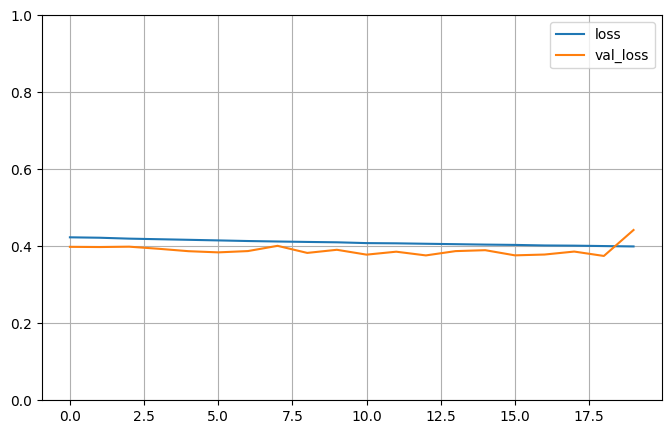

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [10]:
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2) # 创建一个辅助输出层
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [11]:
# 损失函数的权重通过loss_weights参数进行设置 第一个输出层权重为0.9 第二个输出层权重为0.1 因为主输出更重要
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [12]:
history = model.fit(
    (X_train_A, X_train_B), (y_train, y_train), epochs=20,
    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 1.9421 - main_output_loss: 1.6223 - aux_output_loss: 4.8206 - val_loss: 1.4992 - val_main_output_loss: 1.2827 - val_aux_output_loss: 3.4475
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8114 - main_output_loss: 0.6367 - aux_output_loss: 2.3840 - val_loss: 0.9113 - val_main_output_loss: 0.6808 - val_aux_output_loss: 2.9858
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6251 - main_output_loss: 0.5206 - aux_output_loss: 1.5664 - val_loss: 0.7344 - val_main_output_loss: 0.4896 - val_aux_output_loss: 2.9374
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5639 - main_output_loss: 0.4815 - aux_output_loss: 1.3055 - val_loss: 0.6765 - val_main_output_loss: 0.4525 - val_aux_output_loss: 2.6923
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5337 - main_output_loss: 0.4604 - aux_output_loss: 1.1936 - val_loss

In [13]:
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

1/1 [==============================] - 0s 33ms/step


## 绘制学习曲线

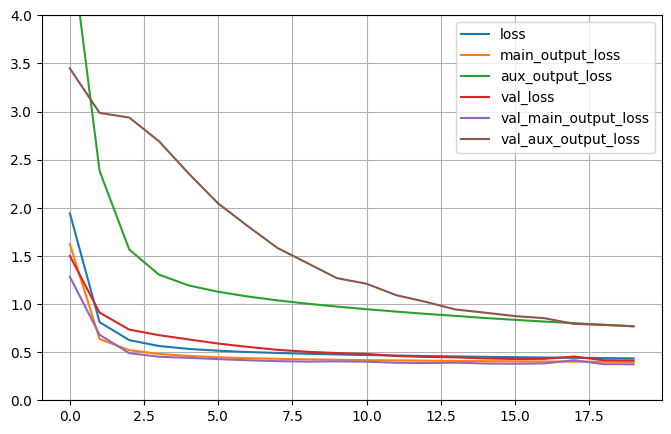

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,4)
plt.show()